Team Members: Rehnuma Shabnam Ananya-rehnuma.ananya@st.ovgu.de , Nasim Uddin Ahmed-nasim.ahmed@st.ovgu.de

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow import keras  
from tensorflow.keras import layers, datasets, models

In [42]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#train_images, test_images = train_images / 255.0, test_images / 255.0
data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255.0, train_labels.reshape([-1]).astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(64).repeat()
print(data)

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255.0, test_labels.reshape([-1]).astype(np.int32))).batch(10000)
print(test_data)

<RepeatDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int32)>
<BatchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int32)>


In [43]:
train_steps = 1000 
inputs = tf.keras.layers.Input((32,32,3))


conv_1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
lay_1 = conv_1(inputs)
max_1 = tf.keras.layers.MaxPool2D((3, 3))
lay_2 = max_1(lay_1)
conv_2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
lay_3 = conv_2(lay_2)
max_2 = tf.keras.layers.MaxPool2D((2, 2))
lay_4 = max_2(lay_3)
conv_3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
lay_5 = conv_3(lay_4)
flat = tf.keras.layers.Flatten()
lay_6 = flat(lay_5)
dense_1 = tf.keras.layers.Dense(64, activation='relu')
lay_7 = dense_1(lay_6)
dense_2 = tf.keras.layers.Dense(10)
outputs = dense_2(lay_7)
models = tf.keras.Model(inputs=inputs, outputs=outputs)
models.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 2, 2, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0   

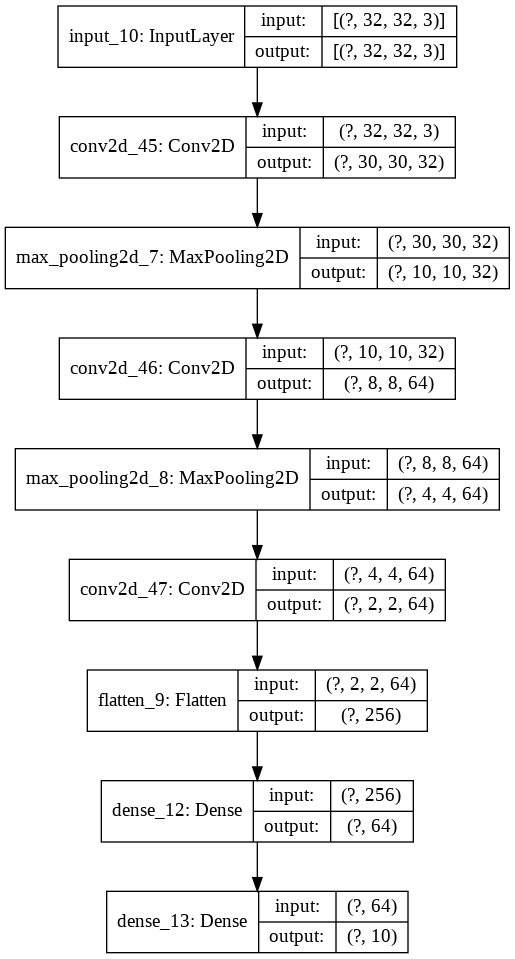

In [44]:
tf.keras.utils.plot_model(models, 'my_first_model_with_shape_info.png', show_shapes=True)

In [45]:
models.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = models.fit(train_images, train_labels,
                    epochs=10,
                     batch_size=64,
                    validation_data=(test_images,test_labels))




Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 2.0579 - accuracy: 0.3569 - val_loss: 1.5146 - val_accuracy: 0.4490
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.3647 - accuracy: 0.5226 - val_loss: 1.3697 - val_accuracy: 0.5200
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.1883 - accuracy: 0.5881 - val_loss: 1.2839 - val_accuracy: 0.5668
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.0781 - accuracy: 0.6299 - val_loss: 1.3950 - val_accuracy: 0.5517
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.0128 - accuracy: 0.6551 - val_loss: 1.2556 - val_accuracy: 0.5831
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.9676 - accuracy: 0.6690 - val_loss: 1.1982 - val_accuracy: 0.6103
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.9312 - accuracy: 0.6861 - val_loss: 1.5354 - val_accuracy: 0.5470
Epoch 

In [46]:
test_scores = models.evaluate(test_images, test_labels, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

313/313 - 1s - loss: 1.2749 - accuracy: 0.6206
Test loss: 1.2749289274215698
Test accuracy: 0.6205999851226807


using  functions gives more accuray than adding sequential layer. before it was about 62%. now it is about 66%

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255.0, train_labels.reshape([-1]).astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(64).repeat()


test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255.0, test_labels.reshape([-1]).astype(np.int32))).batch(128)

In [49]:
train_steps = 1000 
inp = tf.keras.layers.Input((32,32,3))

#initial_conv = tf.keras.layers.Conv2D(64, 7, activation=tf.nn.relu, padding="same")(inp)

#One dense block

conv1_1 = tf.keras.layers.Conv2D(32, 1, activation=tf.nn.relu, padding="same")(inp)
conv1_2 = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu, padding="same")(conv1_1)
conc1 = tf.keras.layers.concatenate([conv1_1, conv1_2])

conv2_1 = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu, padding="same")(conc1)
conc2 = tf.keras.layers.concatenate([conv1_1, conv1_2, conv2_1])

conv3_1 = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu, padding="same")(conc2)
conc3 = tf.keras.layers.concatenate([conv1_1, conv1_2, conv2_1, conv3_1])

conv4_1 = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu, padding="same")(conc3)
conc4 = tf.keras.layers.concatenate([conv1_1, conv1_2, conv2_1, conv3_1, conv4_1])

#transition layer 
conv = tf.keras.layers.Conv2D(64, 1, activation=tf.nn.relu, padding="same")(conc4)
avg_pool = tf.keras.layers.AvgPool2D(2,strides=2, padding='same')(conv)

flat = tf.keras.layers.Flatten()(avg_pool)
out = tf.keras.layers.Dense(10)(flat)

model = tf.keras.Model(inp, out)

model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 32, 32, 32)   128         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 32, 32, 32)   9248        conv2d_48[0][0]                  
__________________________________________________________________________________________________
concatenate_24 (Concatenate)    (None, 32, 32, 64)   0           conv2d_48[0][0]                  
                                                                 conv2d_49[0][0]           

In [0]:
#tf.keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)
init_learning_rate = 1e-4
eps = 1e-4

opt = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon = eps)

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.metrics.SparseCategoricalAccuracy()

In [0]:
@tf.function
def train_step(imgs, lbls):
    with tf.GradientTape() as tape:
        logits = model(imgs)
        xent = loss_fn(lbls, logits)

    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
    opt.apply_gradients(zip(grads, varis))

    return xent, logits

In [54]:
start = time.time()
for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    xent, logits = train_step(img_batch, lbl_batch)

    if not step % 100:
        train_acc_metric(lbl_batch, logits)
        acc = train_acc_metric.result()
        print("Loss: {} Accuracy: {}".format(xent, acc))
        train_acc_metric.reset_states()

        stop = time.time()
        print("took {} seconds\n".format(stop-start))
        start = time.time()

Loss: 1.1650686264038086 Accuracy: 0.59375
took 0.5644795894622803 seconds

Loss: 1.1391745805740356 Accuracy: 0.625
took 0.9930202960968018 seconds

Loss: 1.0122727155685425 Accuracy: 0.65625
took 0.9912657737731934 seconds

Loss: 1.2408928871154785 Accuracy: 0.625
took 0.9913792610168457 seconds

Loss: 1.037615180015564 Accuracy: 0.671875
took 0.996307373046875 seconds

Loss: 1.173929214477539 Accuracy: 0.546875
took 0.9942409992218018 seconds

Loss: 0.828399658203125 Accuracy: 0.734375
took 0.9963703155517578 seconds

Loss: 1.1908406019210815 Accuracy: 0.625
took 0.9910225868225098 seconds

Loss: 0.6943601369857788 Accuracy: 0.75
took 1.2166576385498047 seconds

Loss: 0.9638871550559998 Accuracy: 0.6875
took 0.9955337047576904 seconds

Loss: 0.9150606393814087 Accuracy: 0.703125
took 0.9910233020782471 seconds



In [55]:
test_acc_metric = tf.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))

test_acc_metric.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6438>